In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# <font color='red'>QUESTIONS FOR OFFICE HOURS / STUDY GROUP</font>


- Calculating the confidence intervals? (Q2 and others)
- Q3: how to plot a subsample? Any recommendations
- Double check gammas and shape of curves to make sure I didn't mess it up


### Question 1
> 1. Plot the complementary cumulative distribution function (CCDF).

In [2]:
zipped_file = 'vocab_cs_mod.txt.gz'
column_names = ['k', 'N']
k_N_df = pd.read_csv(zipped_file,
                     compression='gzip',
                     sep=' ',
                     names=column_names)
k_N_df.head()

,k,N
0,30578667846,1
1,22077031422,1
2,21594821357,1
3,19401194714,1
4,16337125274,1


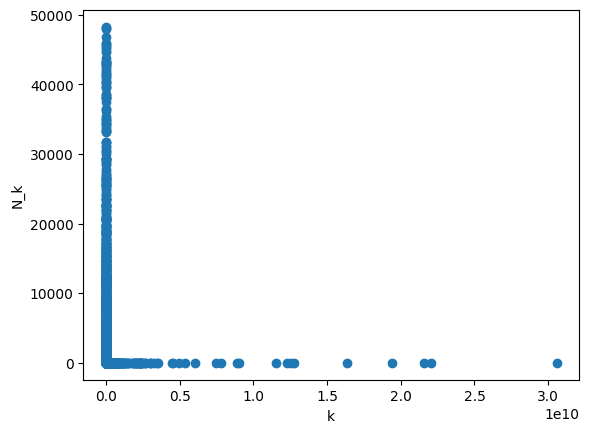

In [40]:
plt.xlabel('k')
plt.ylabel('N_k')
plt.scatter(k_N_df['k'], k_N_df['N'])

In [44]:
# Create cumulative N count
# Needs to be ordered properly first
k_N_df = k_N_df.sort_values(by='k', ascending=False)
k_N_df['cumul_N'] = k_N_df['N'].cumsum()

k_N_df['log10_k'] = np.log10(k_N_df['k'])
k_N_df['log10_Ngreaterk'] = np.log10(k_N_df['cumul_N'])
k_N_df.head()

,k,N,log10_k,log10_N,cumul_N,log10_Ngreaterk
0,30578667846,1,10.485419,0.0,1,0.000000
1,22077031422,1,10.343941,0.0,2,0.301030
2,21594821357,1,10.334350,0.0,3,0.477121
3,19401194714,1,10.287828,0.0,4,0.602060
4,16337125274,1,10.213176,0.0,5,0.698970


In [54]:
k_N_df

,k,N,log10_k,log10_N,cumul_N,log10_Ngreaterk
0,30578667846,1,10.485419,0.000000,1,0.000000
1,22077031422,1,10.343941,0.000000,2,0.301030
2,21594821357,1,10.334350,0.000000,3,0.477121
3,19401194714,1,10.287828,0.000000,4,0.602060
4,16337125274,1,10.213176,0.000000,5,0.698970
...,...,...,...,...,...,...
238586,204,46023,2.309630,4.662975,13346834,7.125378
238587,203,48262,2.307496,4.683605,13395096,7.126946
238588,202,46787,2.305351,4.670125,13441883,7.128460
238589,201,48179,2.303196,4.682858,13490062,7.130014


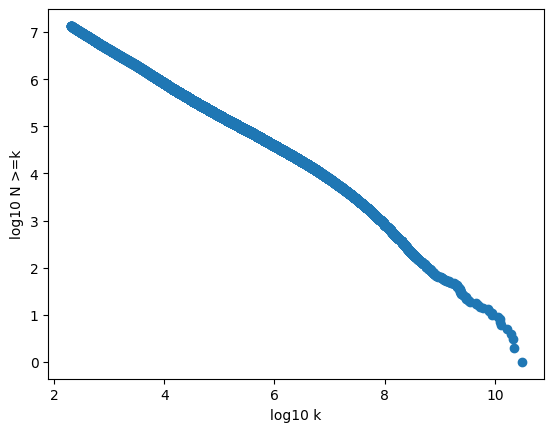

In [46]:
plt.xlabel('log10 k')
plt.ylabel('log10 N >=k')
plt.scatter(k_N_df['log10_k'], k_N_df['log10_Ngreaterk'])

### Question 2
> 2. Using standard linear regression, measure the exponent γ − 1 where γ is the
exponent of the underlying distribution function. Identify and use a range of
frequencies for which scaling appears consistent. Report the 95% confidence
interval for your estimate.
You will find two scaling regimes—please examine them both

In [89]:
# From the last diagram above, it looks like a flat line between log10(k) > 2 and log10(k) = 7
range_1 = {"min": 2, "max": 6.5}

# I don't see another really straight line, but maybe around 8 < log10(k) < 10
range_2 = {"min": 7.5, "max": 9.75}

In [74]:
scaling_range_1 = k_N_df[(k_N_df['log10_k'] < range_1["max"]) & (k_N_df['log10_k'] >= range_1["min"])]
scaling_range_1

,k,N,log10_k,log10_N,cumul_N,log10_Ngreaterk
17873,3162229,1,6.499993,0.000000,17880,4.252368
17874,3162203,1,6.499990,0.000000,17881,4.252392
17875,3161943,1,6.499954,0.000000,17882,4.252416
17876,3161886,1,6.499946,0.000000,17883,4.252440
17877,3161833,1,6.499939,0.000000,17884,4.252465
...,...,...,...,...,...,...
238586,204,46023,2.309630,4.662975,13346834,7.125378
238587,203,48262,2.307496,4.683605,13395096,7.126946
238588,202,46787,2.305351,4.670125,13441883,7.128460
238589,201,48179,2.303196,4.682858,13490062,7.130014


In [75]:
slope_1, intercept_1 = np.polyfit(scaling_range_1['log10_k'], scaling_range_1['log10_Ngreaterk'], 1)
x_range_1 = scaling_range_1['log10_k']
y_range_1 = scaling_range_1['log10_k'] * slope_1 + intercept_1

In [90]:
scaling_range_2 = k_N_df[(k_N_df['log10_k'] < range_2["max"]) & (k_N_df['log10_k'] >= range_2["min"])]
scaling_range_2

,k,N,log10_k,log10_N,cumul_N,log10_Ngreaterk
14,5357090483,1,9.728929,0.0,15,1.176091
15,4957099492,1,9.695228,0.0,16,1.204120
16,4551580934,1,9.658162,0.0,17,1.230449
17,4485993232,1,9.651859,0.0,18,1.255273
18,3513278932,1,9.545713,0.0,19,1.278754
...,...,...,...,...,...,...
2791,31687798,1,7.500892,0.0,2792,3.445915
2792,31679830,1,7.500783,0.0,2793,3.446071
2793,31654945,1,7.500442,0.0,2794,3.446226
2794,31647530,1,7.500340,0.0,2795,3.446382


In [91]:
slope_2, intercept_2 = np.polyfit(scaling_range_2['log10_k'], scaling_range_2['log10_Ngreaterk'], 1)
x_range_2 = scaling_range_2['log10_k']
y_range_2 = scaling_range_2['log10_k'] * slope_2 + intercept_2

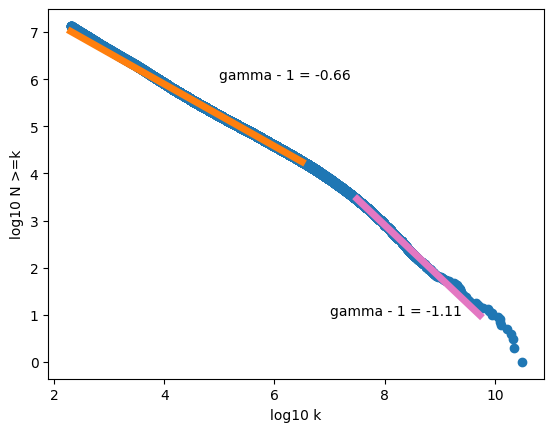

In [92]:
plt.xlabel('log10 k')
plt.ylabel('log10 N >=k')

# Plot CCDF again
plt.scatter(k_N_df['log10_k'], k_N_df['log10_Ngreaterk'])

# Plot linear fit for first range
plt.plot(x_range_1, y_range_1, color="tab:orange", linewidth=5)
plt.text(5, 6, f"gamma - 1 = {slope_1:.2f}")

# Plot linear fit for second range
plt.plot(x_range_2, y_range_2, color="tab:pink", linewidth=5)
plt.text(7, 1, f"gamma - 1 = {slope_2:.2f}")



plt.show()

### Question 3
> 3. Size-rank plots:
Using the alternate data set providing the raw word frequencies, plot word
frequency as a function of rank in the manner of Zipf.
Hint: you will not be able to plot all points (there are close to 14 million) so
think about how to plot a subsample that still shows the full form.

### Question 4
> 4. Using standard linear regression, measure α, Zipf’s exponent. Report the 95%
confidence interval for your estimate.
Again, you will find two regimes

### Question 5
> 5. For each scaling regime, write down how γ and α are related (per lectures) and
check how this expression works for your estimates here.

### Question 6
> 3 + 3) Baby name frequencies in the US:
Note: We will use this data set again in the next assignment.

#### Part A
> Plot the Complementary Cumulative Frequency Distributions and Size-rank
plots (Zipf’s law) for the following:
i. Baby girl names in 1952.
ii. Baby boy names in 1952.
iii. Baby girl names in 2002.
iv. Baby boy names in 2002.
Note that you will have counts that will make the Zipf distribution easy to
plot straight away.
From these counts, you will have to create the distributions Nk and N≥k.

In [7]:
# del names

In [8]:
def csv_to_df(fname):
    columns = ['name', 'gender', 'count']
    df = pd.read_csv(fname, sep=',', names=columns)
    df['year'] = fname[-8:-4]
    return df
    
fpaths = ['data/names-girls1952.txt',
          'data/names-boys1952.txt',
          'data/names-girls2002.txt',
          'data/names-boys2002.txt']
          
for f in fpaths:
    try:
        print(f)
        names = pd.concat((names, csv_to_df(f)))
    except NameError as e:
        names = csv_to_df(f)


data/names-girls1952.txt
data/names-boys1952.txt
data/names-girls2002.txt
data/names-boys2002.txt


In [9]:
names.head()

,name,gender,count,year
0,Linda,F,67082,1952
1,Mary,F,65634,1952
2,Patricia,F,53098,1952
3,Deborah,F,49814,1952
4,Susan,F,41350,1952


In [10]:
 names['rank'] = names.groupby(['gender', 'year'], as_index=False)['count'].rank(ascending=False, method='first')

In [11]:
names['log10_rank'] = np.log10(names['rank'])
names['log10_count'] = np.log10(names['count'])

In [12]:
names.tail(100)

,name,gender,count,year,rank,log10_rank,log10_count
12382,Vail,M,5,2002,12383.0,4.092826,0.69897
12383,Valeriano,M,5,2002,12384.0,4.092861,0.69897
12384,Valerio,M,5,2002,12385.0,4.092896,0.69897
12385,Vallen,M,5,2002,12386.0,4.092931,0.69897
12386,Vandan,M,5,2002,12387.0,4.092966,0.69897
...,...,...,...,...,...,...,...
12477,Zimri,M,5,2002,12478.0,4.096145,0.69897
12478,Zoran,M,5,2002,12479.0,4.096180,0.69897
12479,Zyen,M,5,2002,12480.0,4.096215,0.69897
12480,Zylan,M,5,2002,12481.0,4.096249,0.69897


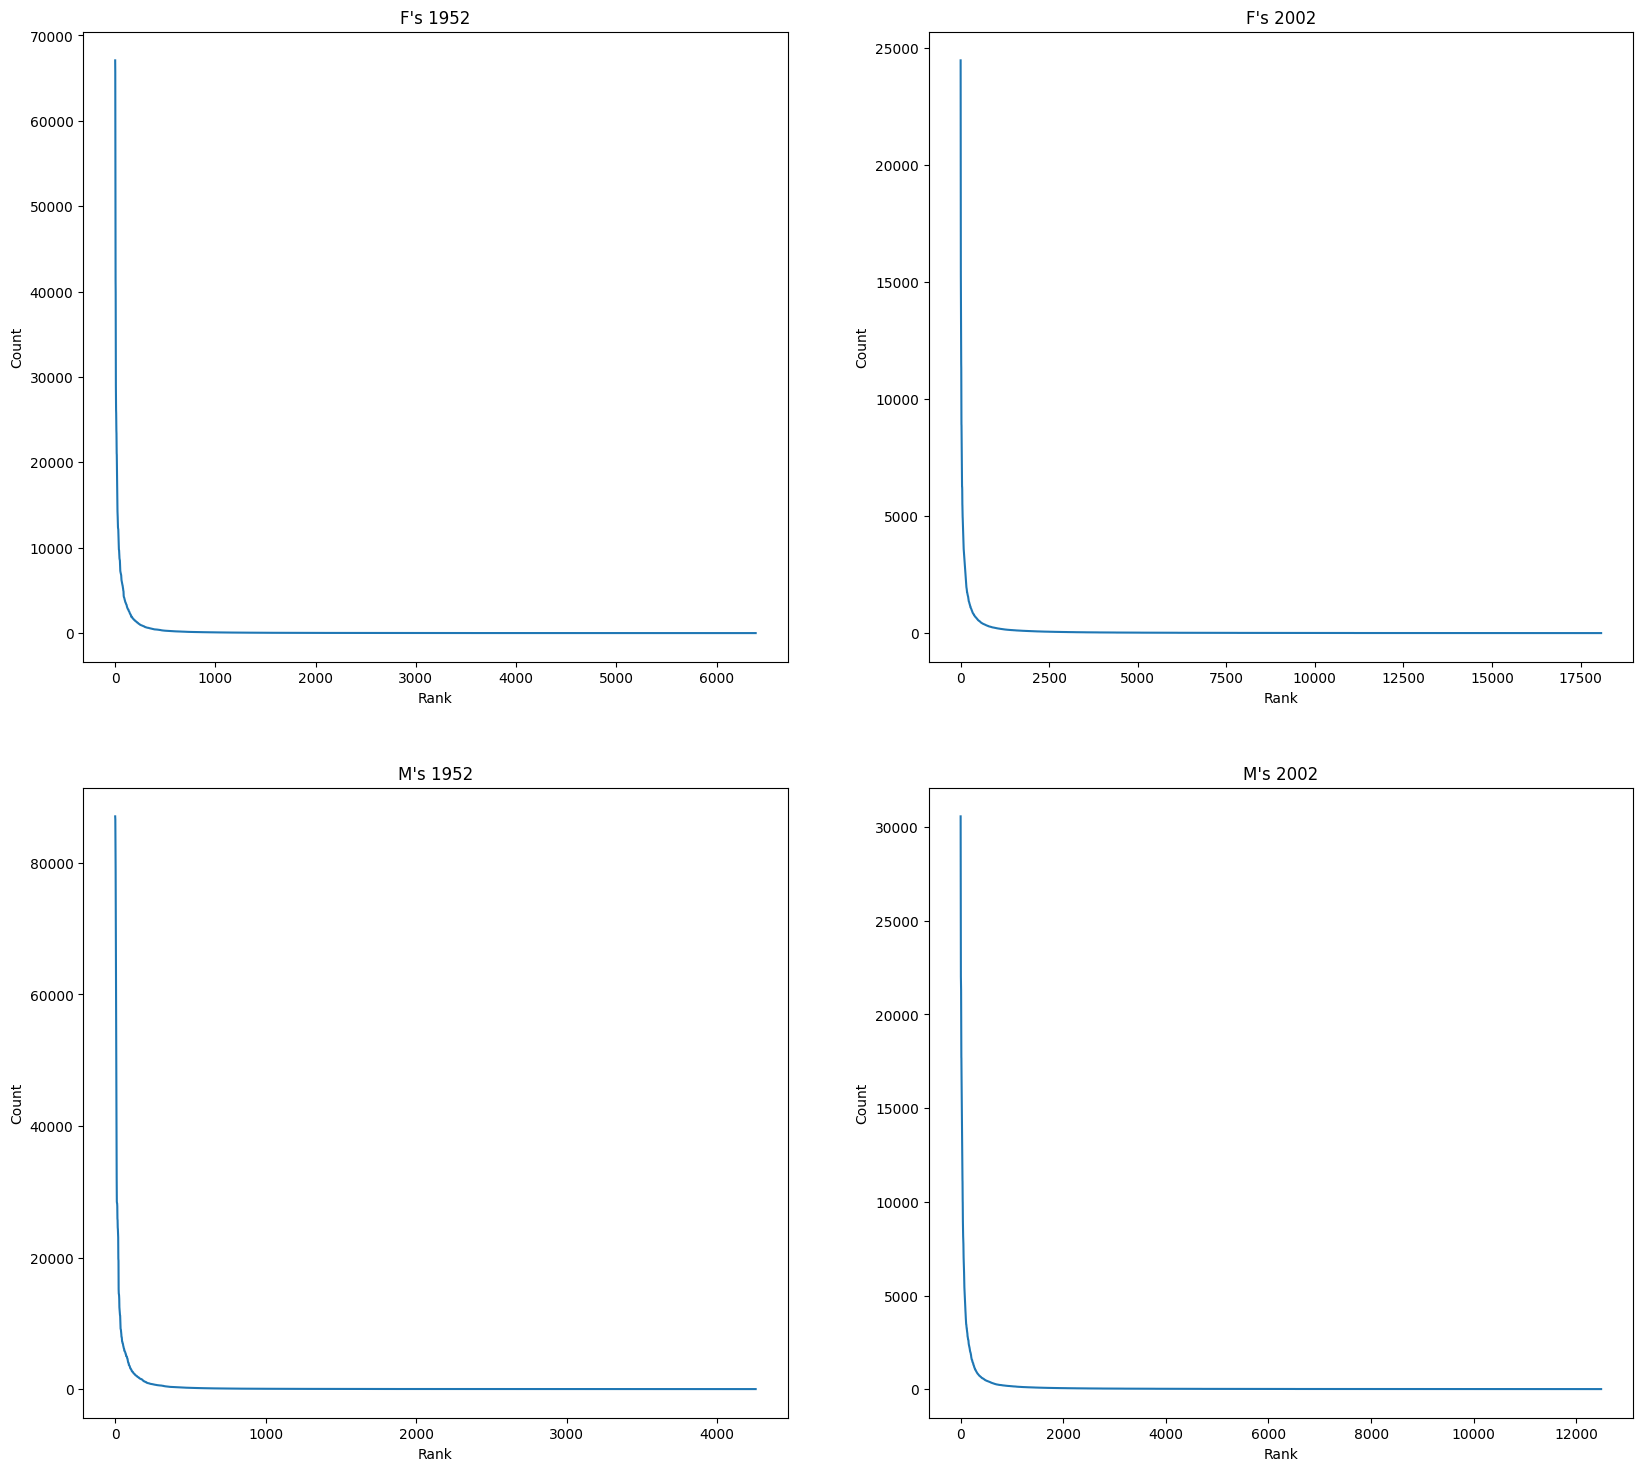

In [13]:
genders = ['F', 'M']
years = ['1952', '2002']


fig, ax = plt.subplots(len(genders), len(years), figsize=(20,18))

for i, gender in enumerate(genders):
    for j, year in enumerate(years):
        # get data
        x = names[(names['year'] == year) & (names['gender'] == gender)]['rank']
        y = names[(names['year'] == year) & (names['gender'] == gender)]['count']

        # set axis titles
        ax[i,j].set_xlabel('Rank')
        ax[i,j].set_ylabel('Count')
        ax[i,j].title.set_text(gender + "'s " + year)

        # plot
        ax[i,j].plot(x, y)

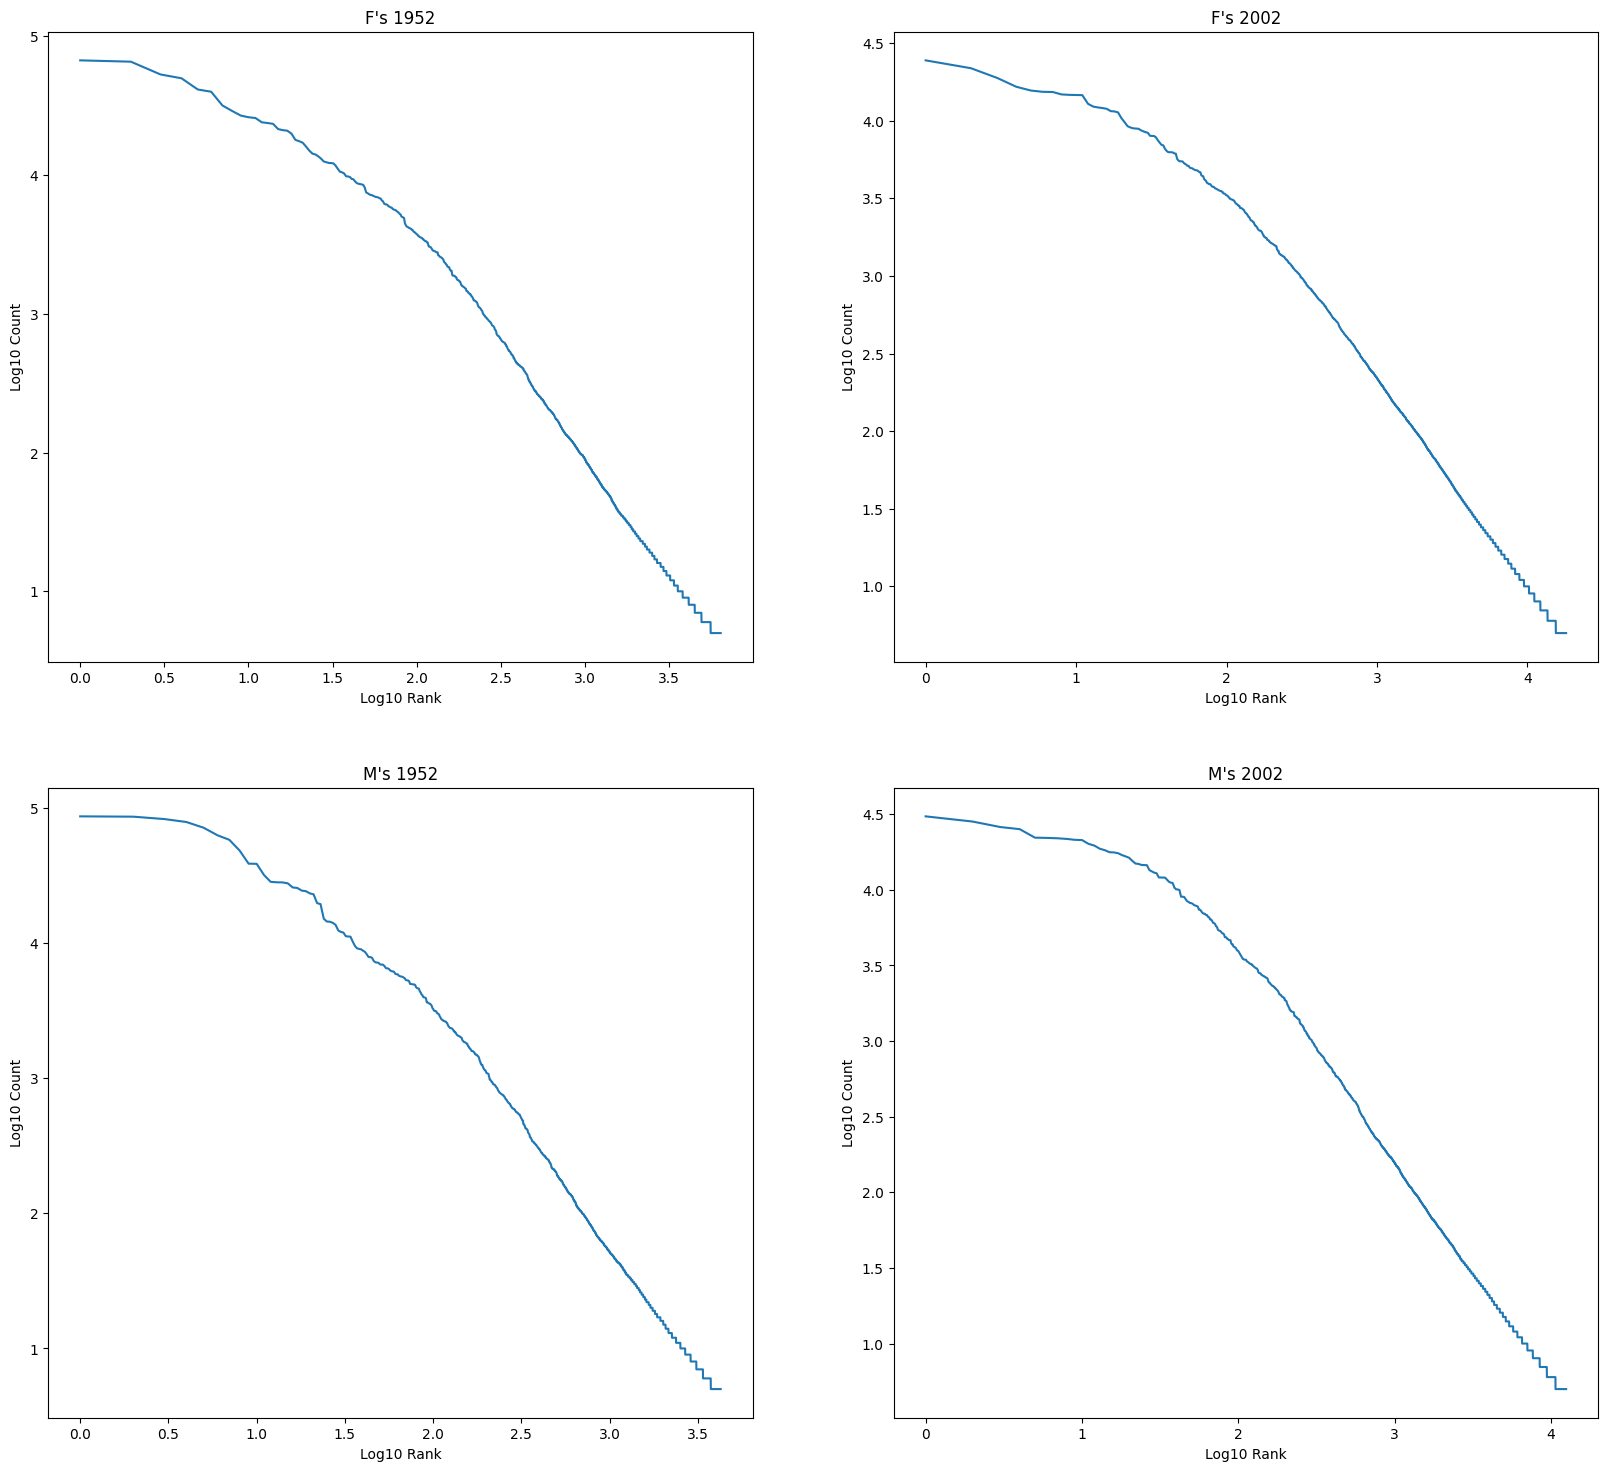

In [14]:
genders = ['F', 'M']
years = ['1952', '2002']


fig, ax = plt.subplots(len(genders), len(years), figsize=(20,18))

for i, gender in enumerate(genders):
    for j, year in enumerate(years):
        # get data
        x = names[(names['year'] == year) & (names['gender'] == gender)]['log10_rank']
        y = names[(names['year'] == year) & (names['gender'] == gender)]['log10_count']

        # set axis titles
        ax[i,j].set_xlabel('Log10 Rank')
        ax[i,j].set_ylabel('Log10 Count')
        ax[i,j].title.set_text(gender + "'s " + year)

        # plot
        ax[i,j].plot(x, y)

In [17]:
frequencies = names.groupby(['gender', 'year', 'count'], as_index=False)['name'].count()

In [37]:
frequencies['log10_k'] = np.log10(frequencies['count'])
frequencies = frequencies.sort_values(by='count', ascending=False)
frequencies['cumul_name_count'] = frequencies.groupby(['gender', 'year'])['name'].cumsum()
frequencies['log10_Ngreaterk'] = np.log10(frequencies['cumul_name_count'])
frequencies.head()

,gender,year,count,name,log10_k,log10_Nk,cumul_name_count,log10_Ngreaterk
2197,M,1952,87063,1,4.939834,0.0,1,0.000000
2196,M,1952,86604,1,4.937538,0.0,2,0.301030
2195,M,1952,83138,1,4.919800,0.0,3,0.477121
2194,M,1952,79049,1,4.897896,0.0,4,0.602060
2193,M,1952,71750,1,4.855822,0.0,5,0.698970


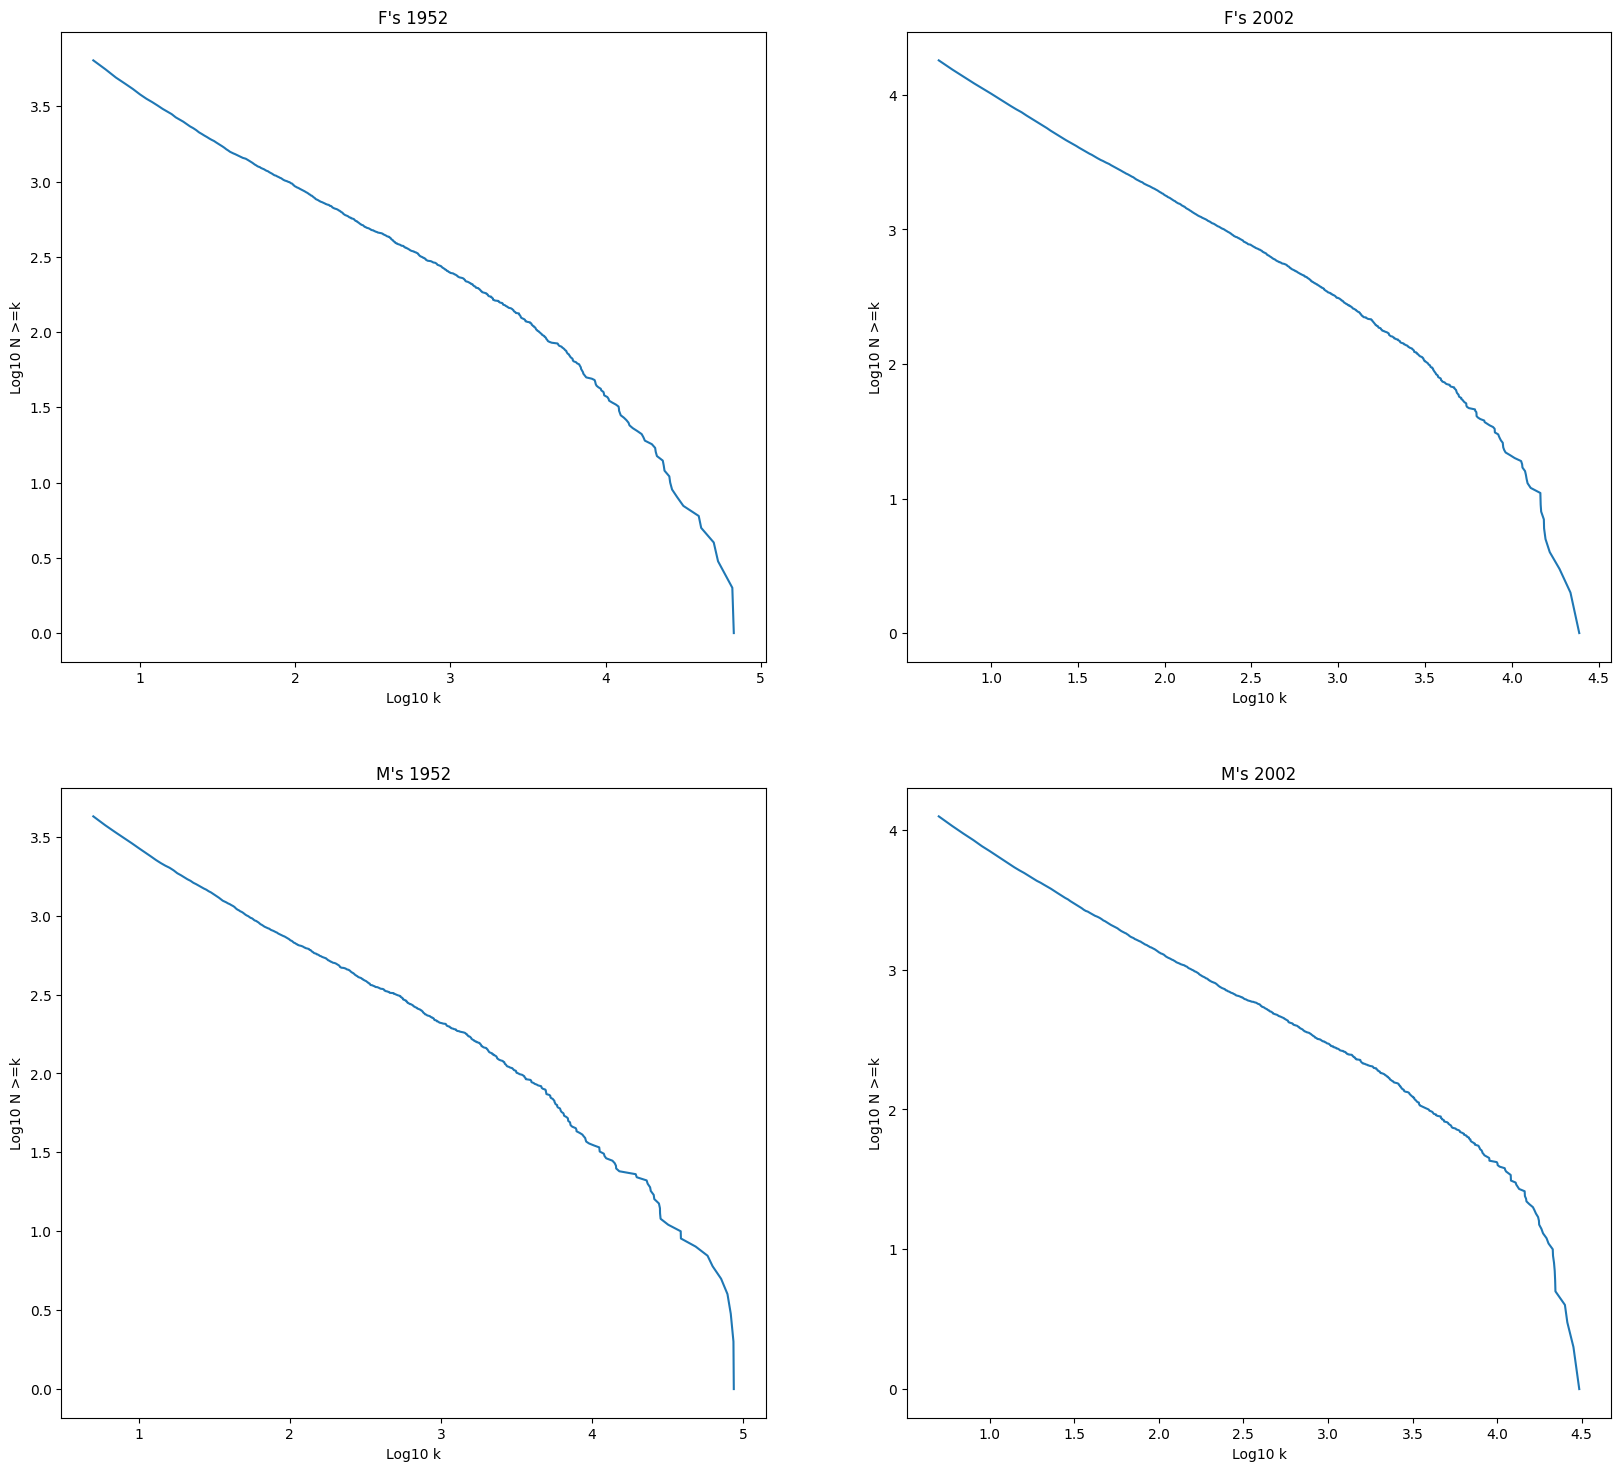

In [39]:
genders = ['F', 'M']
years = ['1952', '2002']


fig, ax = plt.subplots(len(genders), len(years), figsize=(20,18))

for i, gender in enumerate(genders):
    for j, year in enumerate(years):
        # get data
        x = frequencies[(frequencies['year'] == year) & (frequencies['gender'] == gender)]['log10_k']
        y = frequencies[(frequencies['year'] == year) & (frequencies['gender'] == gender)]['log10_Ngreaterk']

        # set axis titles
        ax[i,j].set_xlabel('Log10 k')
        ax[i,j].set_ylabel('Log10 N >=k')
        ax[i,j].title.set_text(gender + "'s " + year)

        # plot
        ax[i,j].plot(x, y)

#### Part B
> As you did for the Google data set, fit regression lines and report values of γ
and the Zipf exponent α.
BUT: Only fit lines if fitting lines make sense!
You may only have one region of scaling or zero.